In [1]:
import pandas as pd
import modules.analysis as analysis
import modules.utils as utils

# TS decomposition analysis
## Create metric CSV

In [2]:
df = analysis.eval_metrics('2022103113574994', out_path='analysis/benchmark/', min_months=24)

## Plot benchmark charts

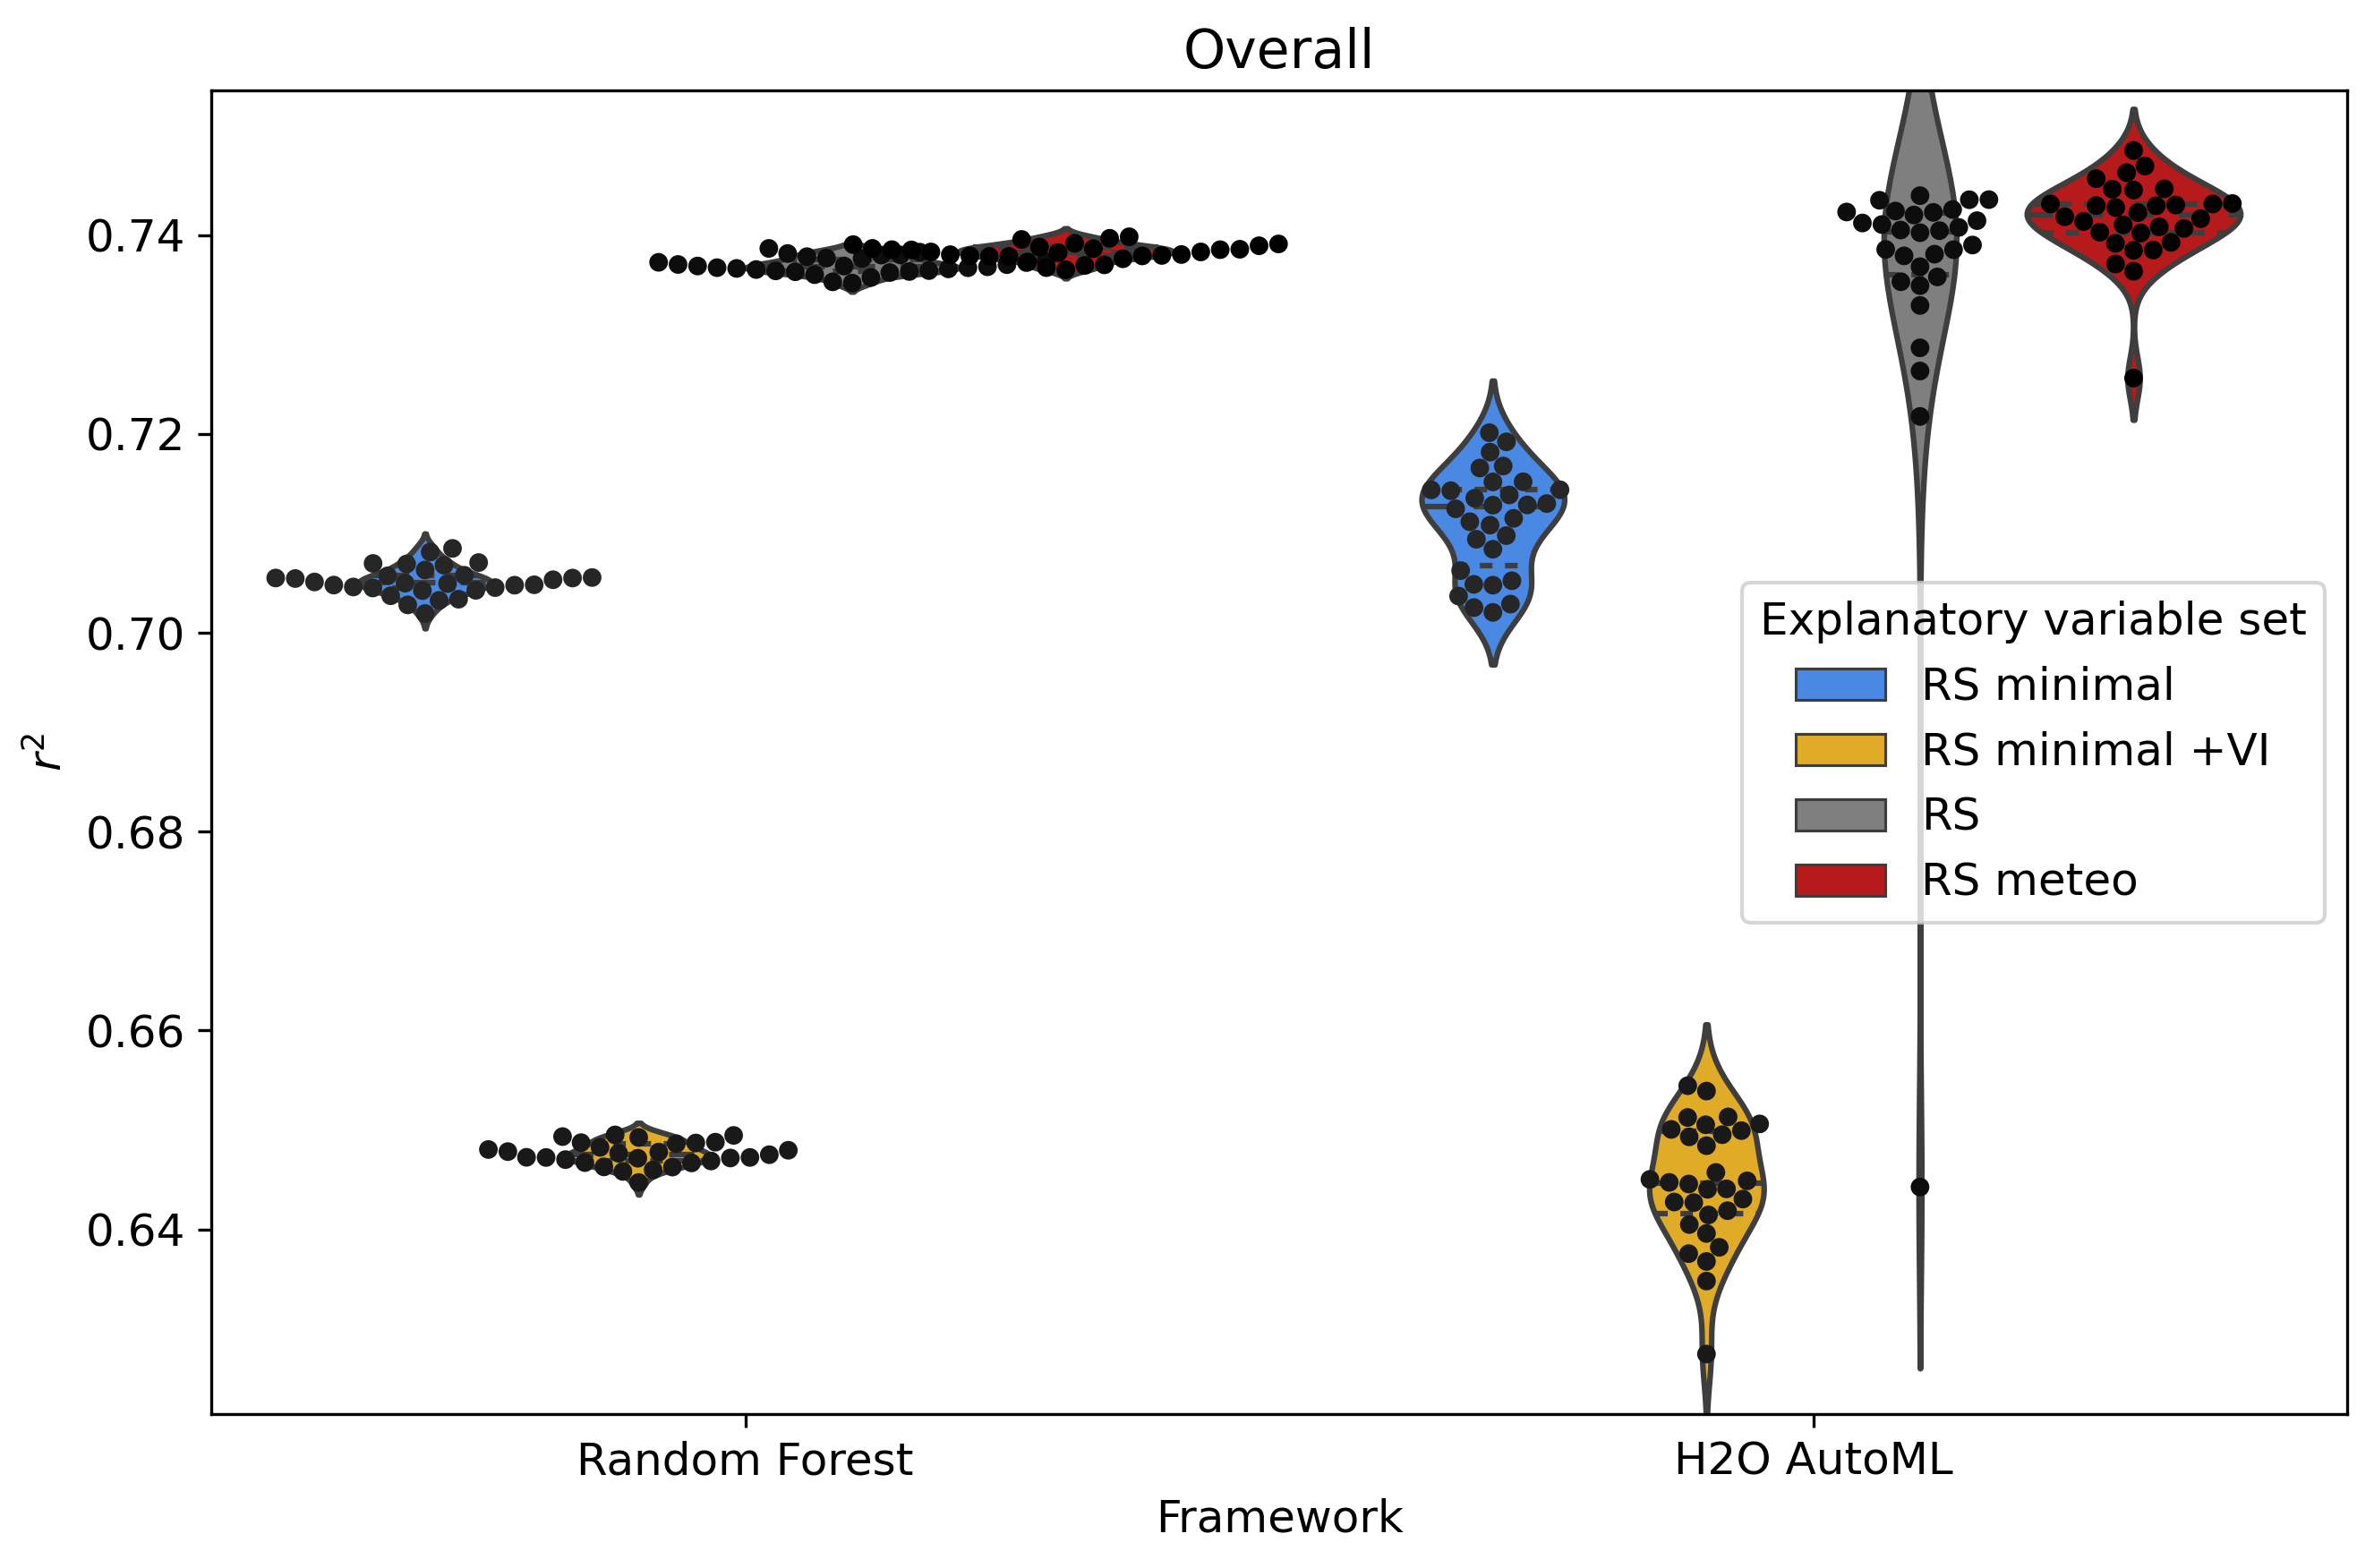

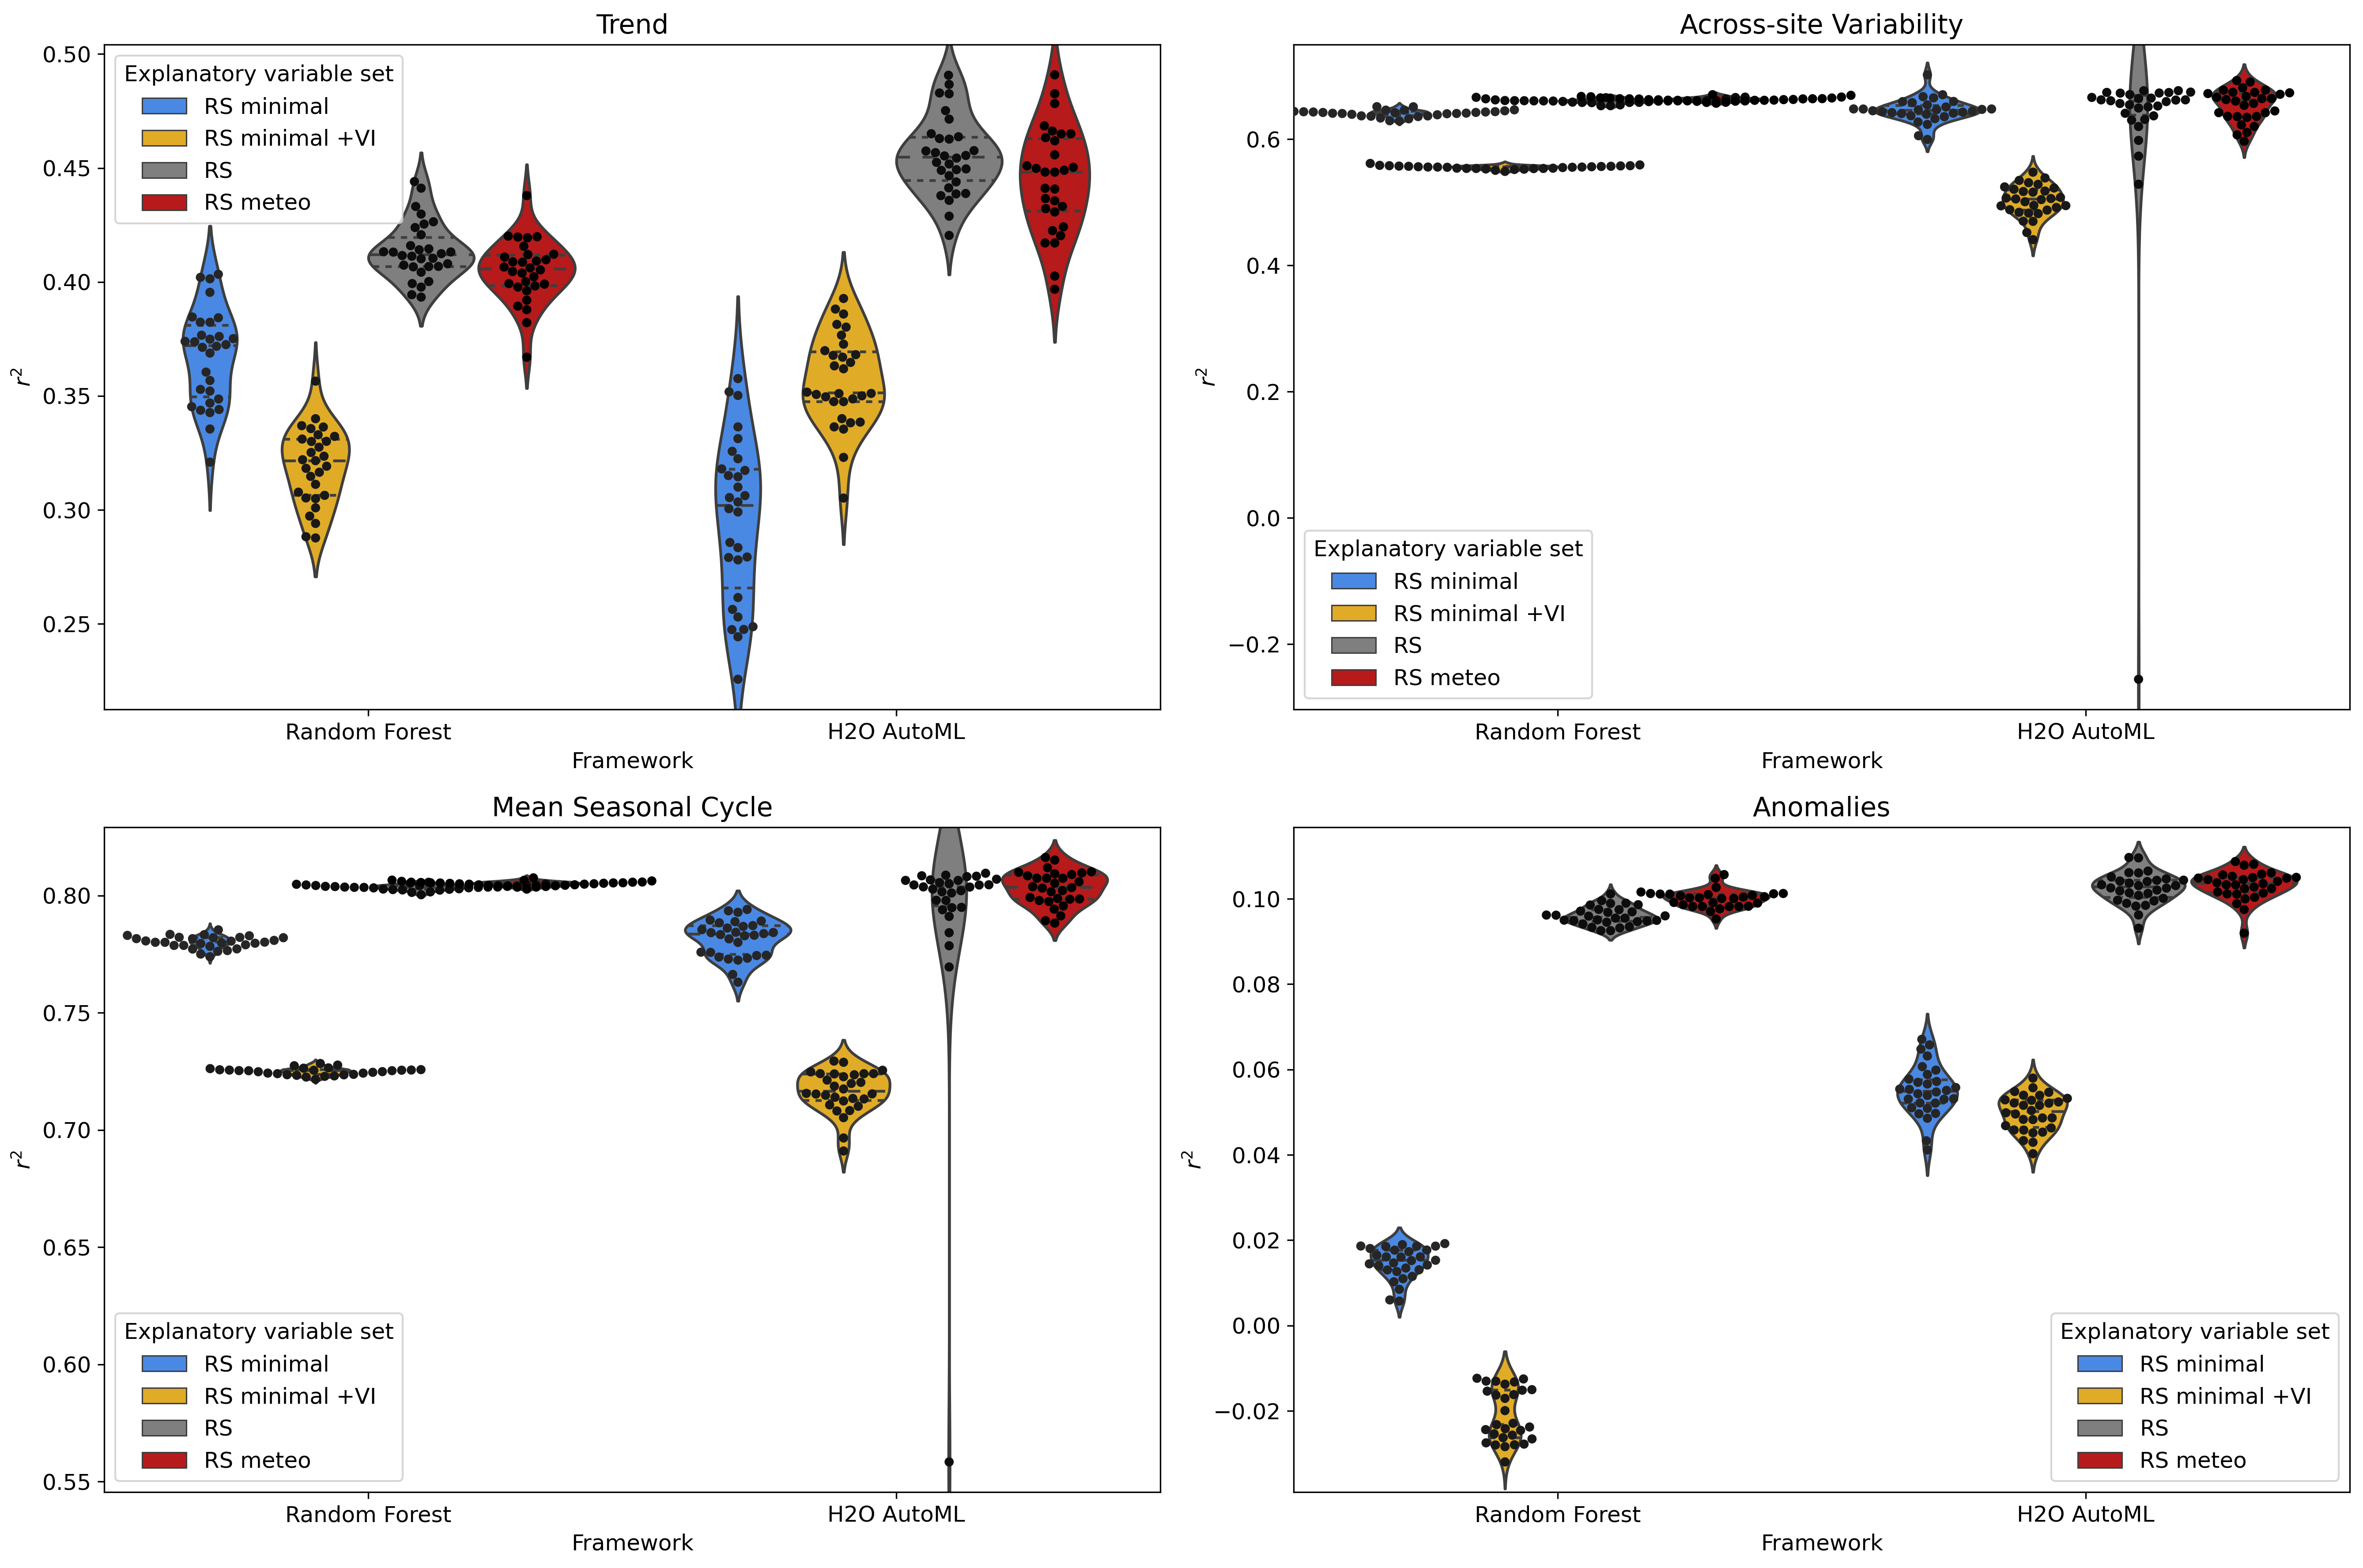

In [3]:
exp_ids = [2022102313544246, 2022102313544325, 2022102413545779, 2022102413545599, 2022102513552709, 2022102513552801, 2022103113574994, 2022103113574896]
var_sets = ['RS minimal', 'RS minimal', 'RS minimal +VI', 'RS minimal +VI', 'RS', 'RS', 'RS meteo', 'RS meteo']
frameworks = ['Random Forest', 'H2O AutoML', 'Random Forest', 'H2O AutoML', 'Random Forest', 'H2O AutoML', 'Random Forest', 'H2O AutoML']

frames =[]
for idx, exp_id in enumerate(exp_ids):
    df = pd.read_csv('analysis/benchmark/' + str(exp_id) + '/metrics.csv')
    df['Explanatory variable set'] = var_sets[idx]
    df['Framework'] = frameworks[idx]
    frames.append(df)
    
df = pd.concat(frames)
analysis.plt_model_comparison(df, 'analysis/benchmark/', 'Explanatory variable set', 'Framework', 'r2_overall')

# Land cover analysis
## Create LC metrics

In [13]:
sites = pd.read_csv('data/ec/sites_meta_v1.csv', index_col=0)
lc_metrics = analysis.eval_lc('2022102513552801', 'experiments/', sites, out_path='analysis/benchmark/', min_months=24)

## Plot LC analysis

In [16]:
lc_metrics = pd.read_csv('analysis/benchmark/2022102513552801/metrics_lc.csv', index_col='SITE_ID')
lc_metrics = lc_metrics.rename(columns={'IGBP': 'Land Cover'}).reset_index()

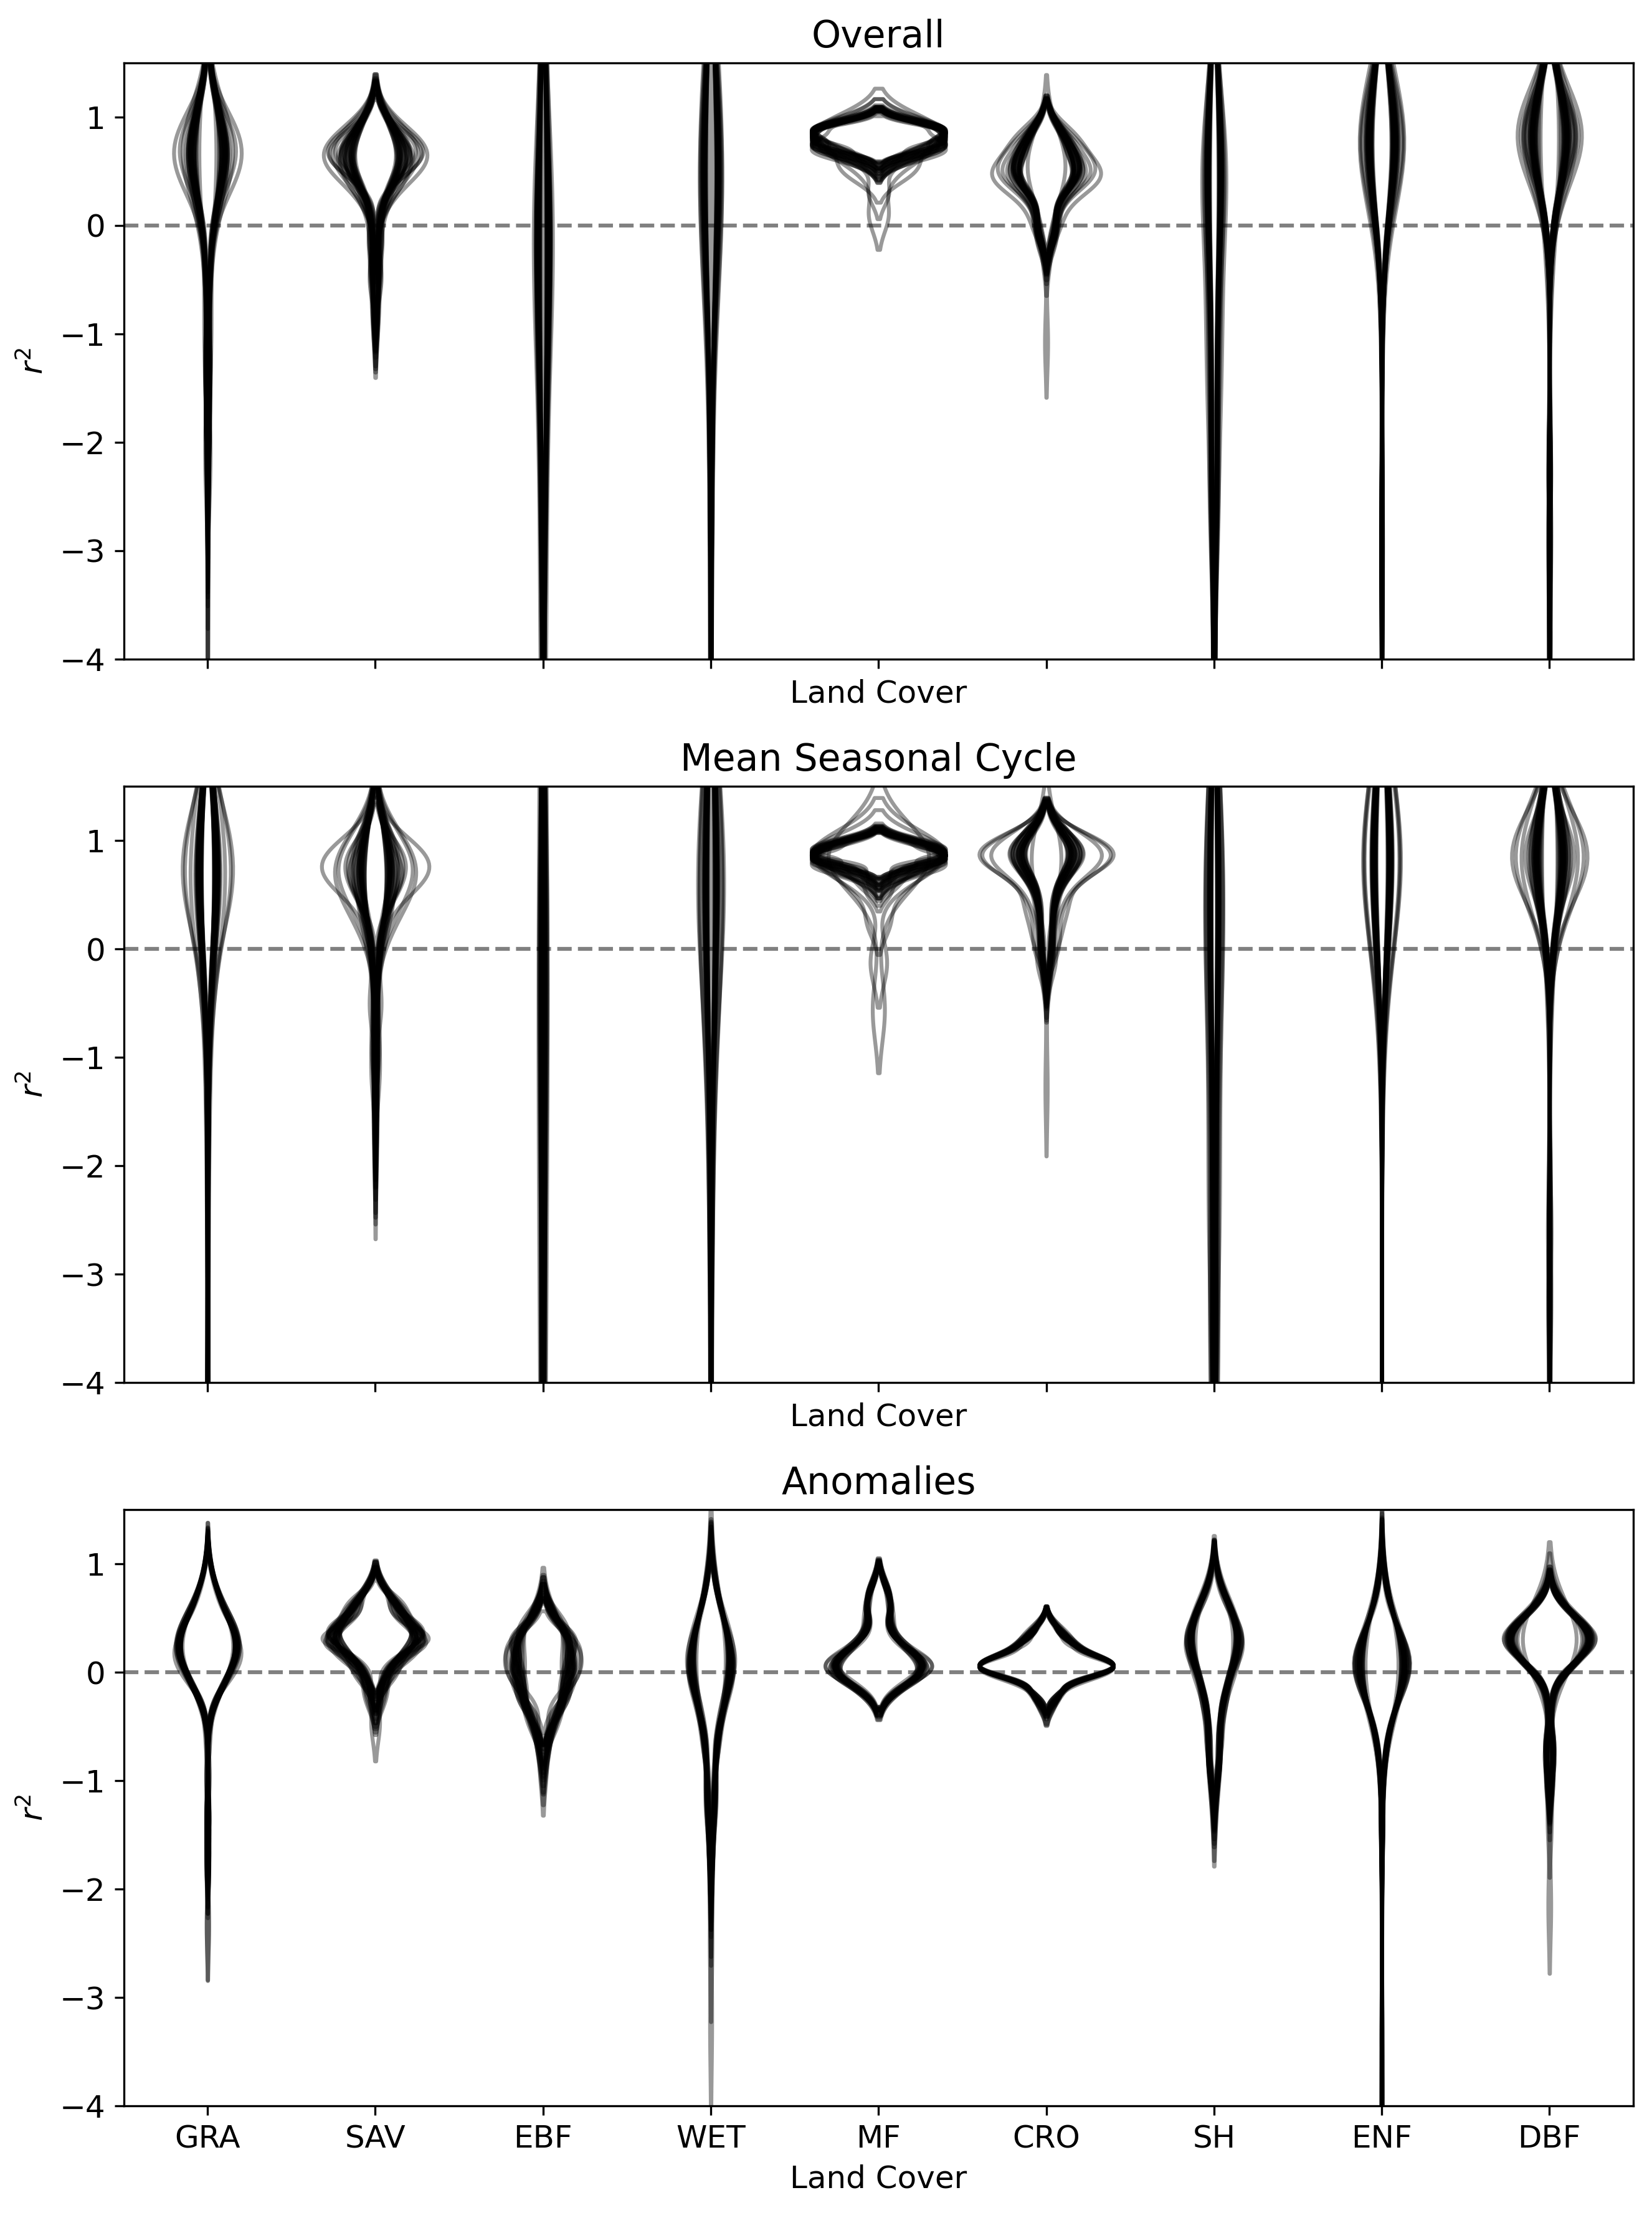

In [18]:
analysis.plt_lc_violin(lc_metrics, 'analysis/benchmark', 'Land Cover', 'exp_id')

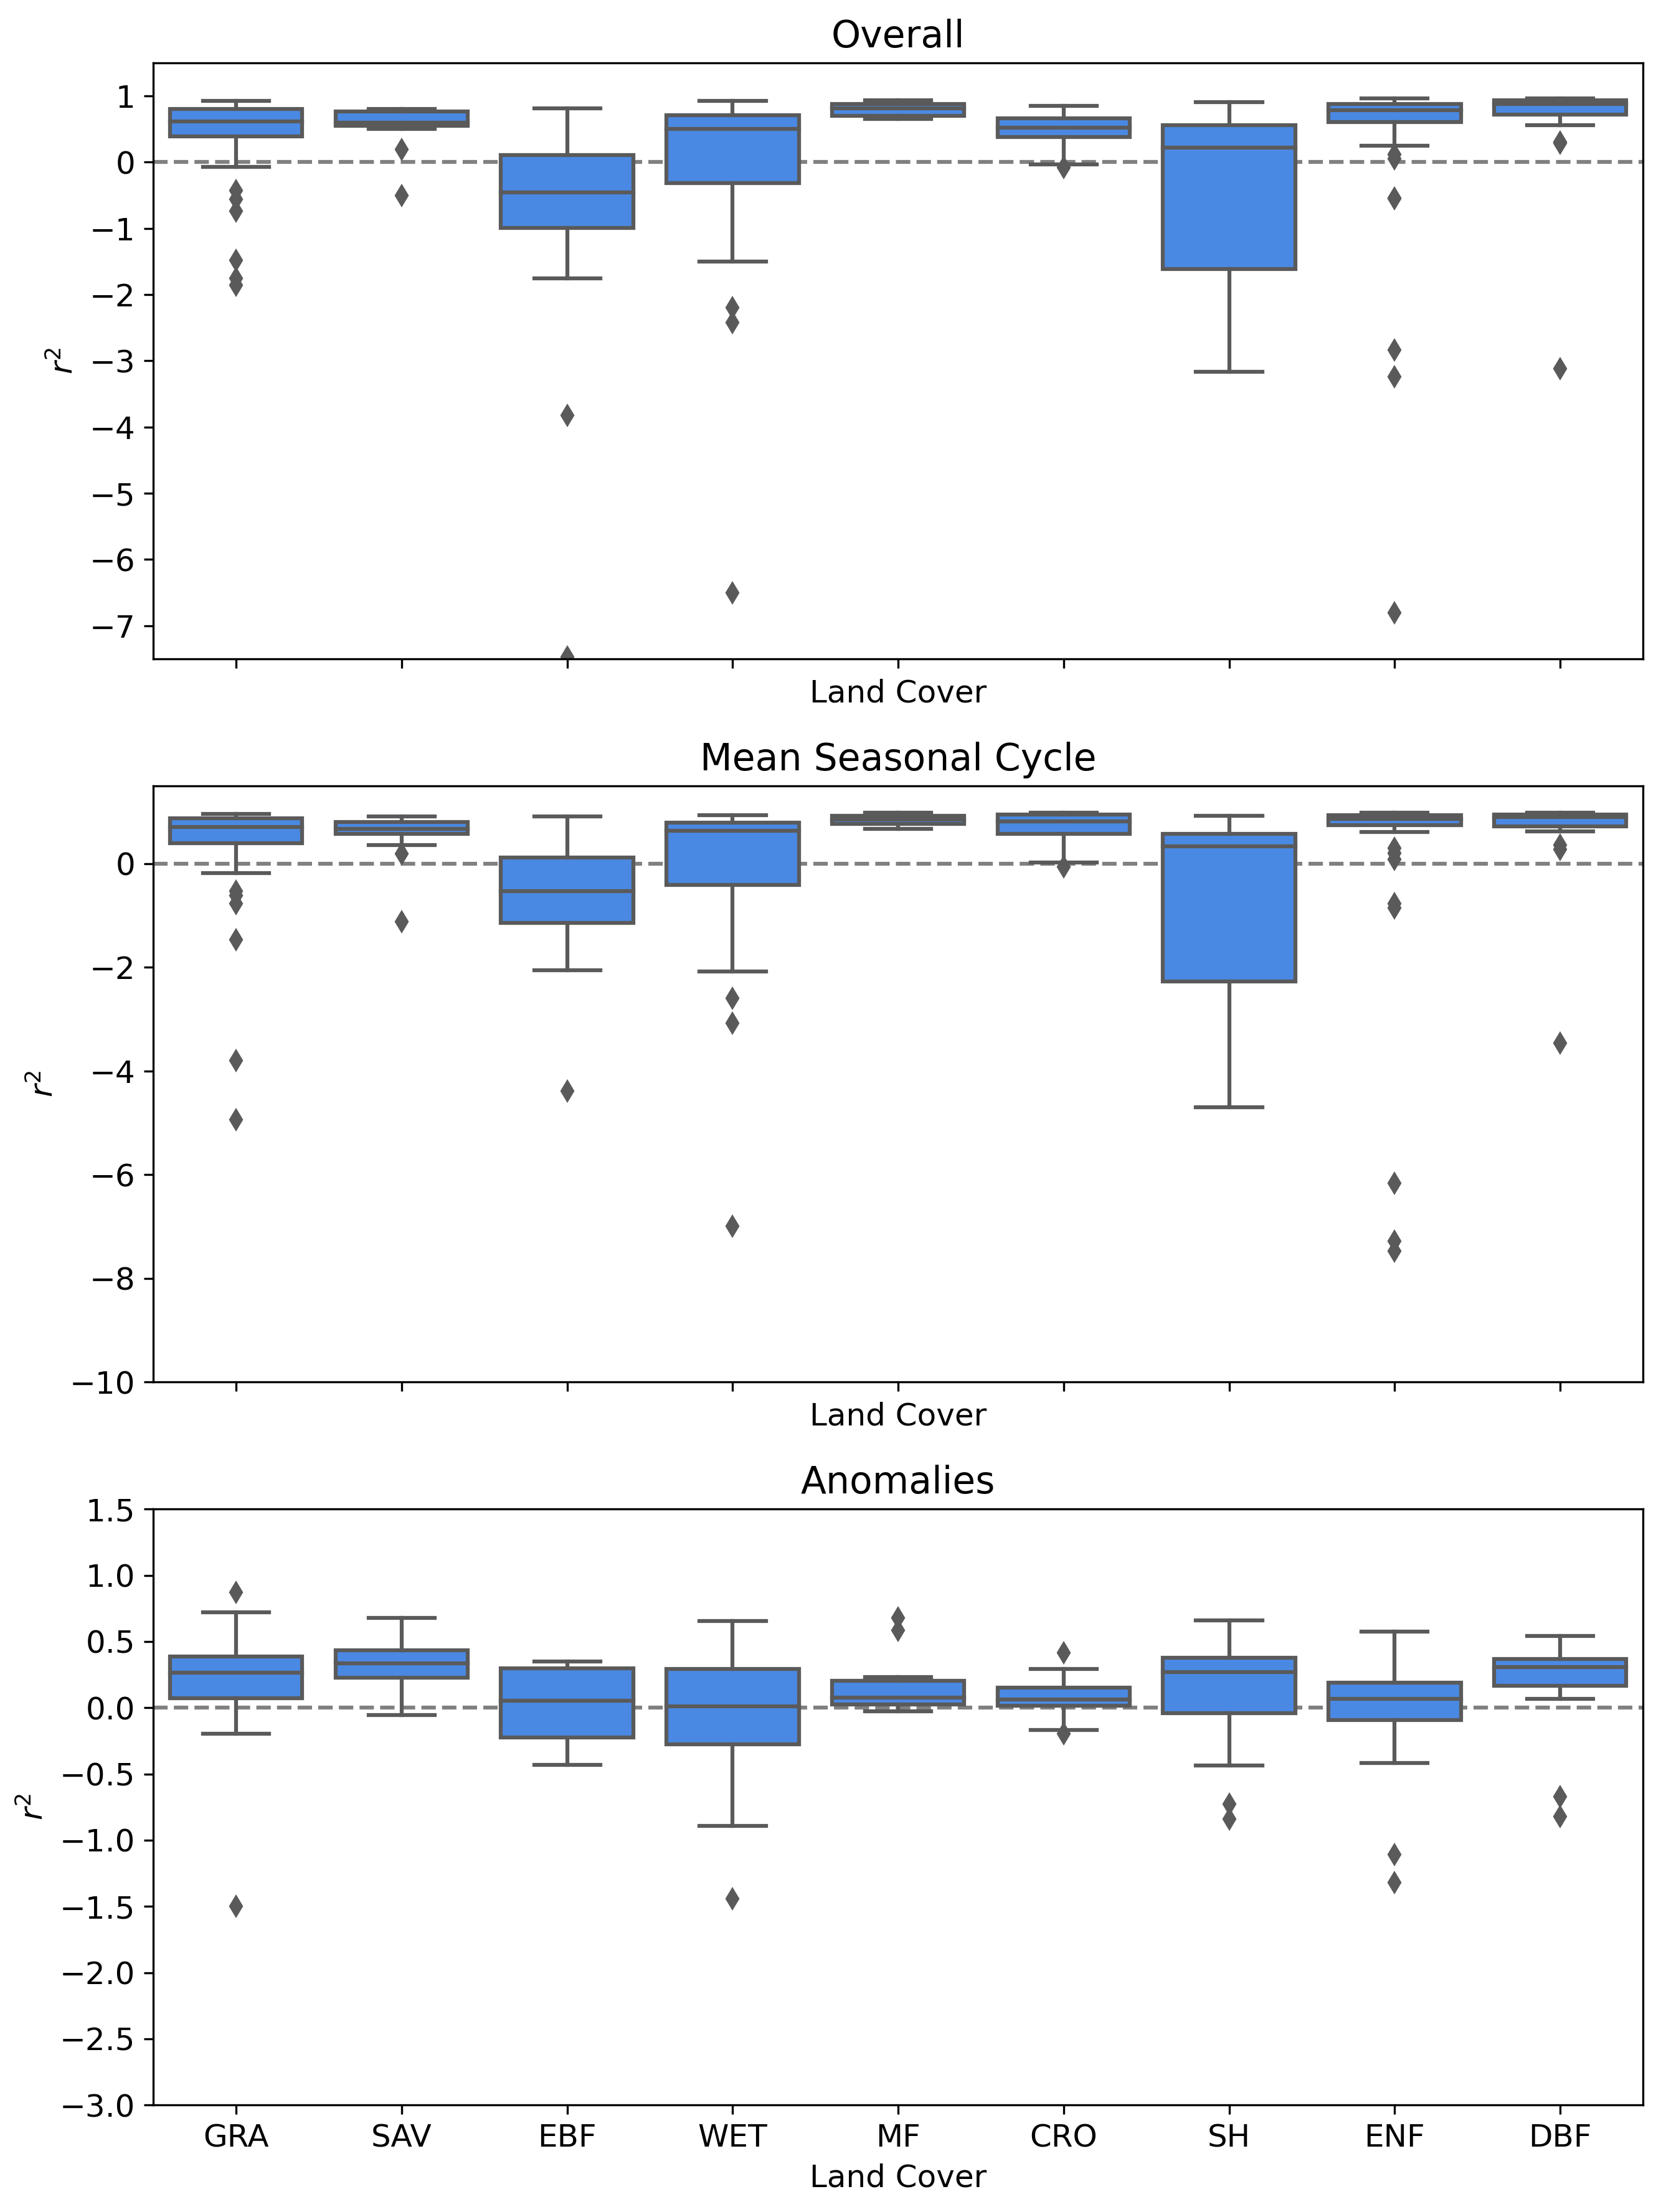

In [19]:
analysis.plt_lc_meanbox(lc_metrics, 'analysis/benchmark', 'Land Cover', 'exp_id')

In [9]:
from importlib import reload
reload(analysis)
reload(utils)

<module 'modules.utils' from '/global/scratch/users/maxgaber/gpp_upscaling/gpp/modules/utils.py'>